In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\ninzaami\loan-predication\versions\1


In [112]:
file=os.listdir(path)
file

['train_u6lujuX_CVtuZ9i (1).csv']

In [113]:
df=pd.read_csv(os.path.join(path,'train_u6lujuX_CVtuZ9i (1).csv'))


In [114]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## function_transformer
used to chnge the data pattern

In [115]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\smc\AppData\Local\Temp\ipykernel_8132\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


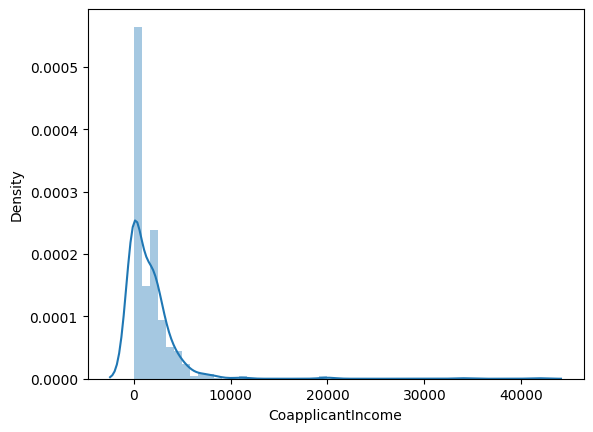

In [116]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [117]:
Q1=df['CoapplicantIncome'].quantile(0.25)
Q3=df['CoapplicantIncome'].quantile(0.75)

IQR= Q3-Q1
IQR

2297.25

In [118]:
min_range= Q1-(1.5*IQR)
max_range= Q3+(1.5*IQR)
min_range, max_range

(-3445.875, 5743.125)

In [119]:
df=df[df['CoapplicantIncome']<=max_range]

In [120]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


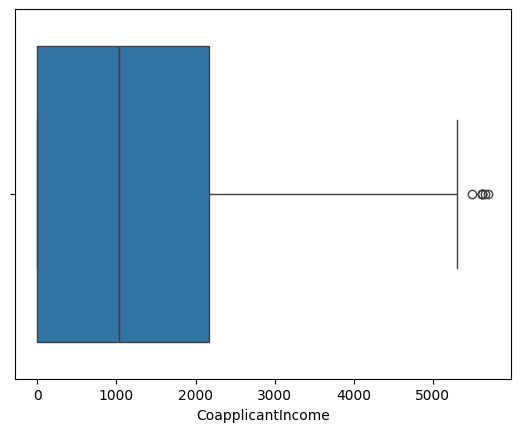

In [121]:
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

In [122]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

## FunctionTransformer

FunctionTransformer is used when we don't want to remove outliers, 
but we want to compress or normalize skewed data.



In [123]:
ft=FunctionTransformer(func=np.log1p)

In [124]:
ft.fit_transform(df['CoapplicantIncome'])

0      0.000000
1      7.319202
2      0.000000
3      7.765993
4      0.000000
         ...   
609    0.000000
610    0.000000
611    5.484797
612    0.000000
613    0.000000
Name: CoapplicantIncome, Length: 596, dtype: float64

In [125]:
df['CoapplicantIncome_tf']=ft.fit_transform(df[['CoapplicantIncome']])


C:\Users\smc\AppData\Local\Temp\ipykernel_8132\997132343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoapplicantIncome_tf']=ft.fit_transform(df[['CoapplicantIncome']])


In [126]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_tf
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.484797
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.000000


C:\Users\smc\AppData\Local\Temp\ipykernel_8132\727876607.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\smc\AppData\Local\Temp\ipykernel_8132\727876607.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_tf'])


<Axes: xlabel='CoapplicantIncome_tf', ylabel='Density'>

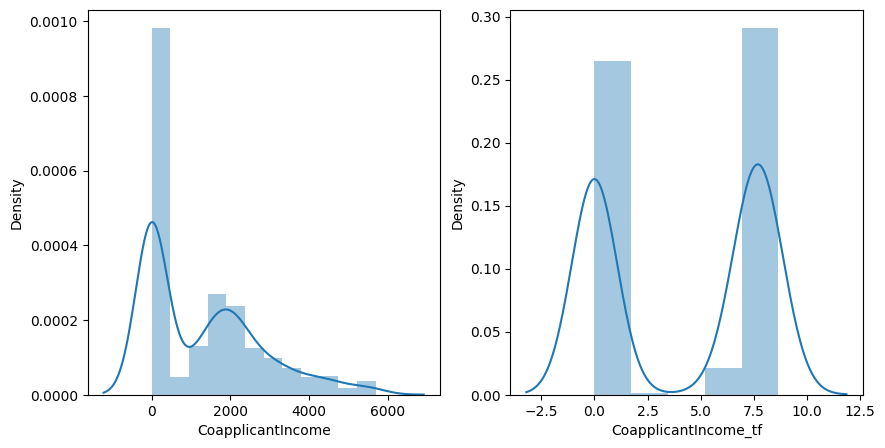

In [127]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title=('Before')
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title=('After')
sns.distplot(df['CoapplicantIncome_tf'])


This graph was implemented after removing outliers

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\ninzaami\loan-predication\versions\1


In [131]:
file=os.listdir(path)
file

['train_u6lujuX_CVtuZ9i (1).csv']

In [133]:
df1=pd.read_csv(os.path.join(path,'train_u6lujuX_CVtuZ9i (1).csv'))


<Axes: xlabel='CoapplicantIncome'>

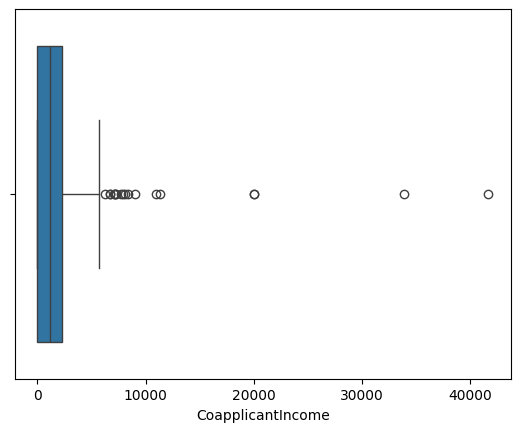

In [134]:
sns.boxplot(x=df1['CoapplicantIncome'])

In [135]:
ft=FunctionTransformer(func=np.log1p)

In [136]:
ft.fit_transform(df1['CoapplicantIncome'])

0      0.000000
1      7.319202
2      0.000000
3      7.765993
4      0.000000
         ...   
609    0.000000
610    0.000000
611    5.484797
612    0.000000
613    0.000000
Name: CoapplicantIncome, Length: 614, dtype: float64

In [137]:
df1['CoapplicantIncome_tf']=ft.fit_transform(df1[['CoapplicantIncome']])


C:\Users\smc\AppData\Local\Temp\ipykernel_8132\2523876969.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['CoapplicantIncome'])
C:\Users\smc\AppData\Local\Temp\ipykernel_8132\2523876969.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['CoapplicantIncome_tf'])


<Axes: xlabel='CoapplicantIncome_tf', ylabel='Density'>

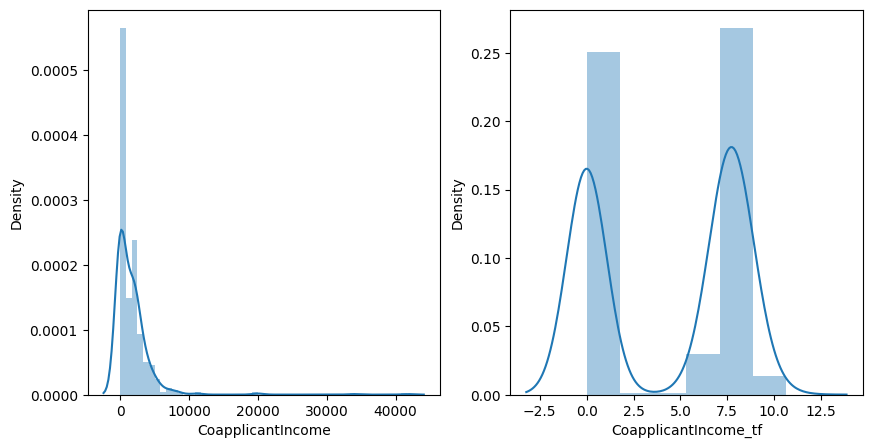

In [138]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title=('Before')
sns.distplot(df1['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title=('After')
sns.distplot(df1['CoapplicantIncome_tf'])


FunctionTransformer is used when we don't want to remove outliers, 
but we want to compress or normalize skewed data.
There is no difference